# 一般逆行列

一般逆行列に対していろいろ確認してみる．

- ライブラリを用いて得た一般逆行列が，特異値分解を利用して求めた結果と一致することを示す．

- $A$ の一般逆行列と連立方程式 $Ax=b$ との関係を確認する．

`numpy` の線形代数用のライブラリ `numpy.linalg` を用いる．（参考 https://numpy.org/doc/stable/reference/routines.linalg.html  ）

In [2]:
# 必要なライブラリの import
import numpy as np
nl = np.linalg

## 逆行列を求める

`np.linalg.inv` で簡単にできる．上で `nl = np.linalg` とエイリアスを設定しているので以下のようにできる．
逆行列が存在しない(行列が正則でない)場合はエラーになる．

以下において，行列 $A$ は正則(行列式が非ゼロ)だが， $B$ は正則でない(行列式が0)ので， $B$ の逆行列は存在しない．

In [3]:
# 行列を定義し，その逆行列を表示してみる
A = np.array([[2, 3], [1, 2]])
print('|A| = {0}\n'.format(nl.det(A)))
print('A =\n {0}\n'.format(A))
print('A^-1 = \n {0}\n'.format(nl.inv(A)))

print('AA^-1 = \n{0}'.format(np.dot(A, nl.inv(A))))

|A| = 1.0

A =
 [[2 3]
 [1 2]]

A^-1 = 
 [[ 2. -3.]
 [-1.  2.]]

AA^-1 = 
[[1. 0.]
 [0. 1.]]


In [4]:
B = np.array([[2,1],[6,3]])
print('|B| = {0}\n'.format(nl.det(B)))
print('B =\n {0}\n'.format(B))
print('B^-1 = \n {0}\n'.format(nl.inv(B))) # エラー発生

|B| = 0.0

B =
 [[2 1]
 [6 3]]



LinAlgError: Singular matrix

## 一般逆行列を求める

`nl.pinv` ( 'p' は 'pseudo' の頭文字 ) で一般逆行列の計算ができる．
上の非正則行列 $B$ の一般逆行列を求める．

In [5]:
print('B^- = \n {0}\n'.format(nl.pinv(B)))

B^- = 
 [[0.04 0.12]
 [0.02 0.06]]



## 特異値分解との関係

$B = USV^T$ と特異値分解できるとき，$B$ の一般逆行列 $B^-$ は$B^- = VS^{-1}U^T$ と分解できる．

$S$ は特異値が並んだ行列となるので，$S^{-1}$ は非ゼロの特異値($S$ の非ゼロ要素)を逆数にした行列となる．

以下で，上の非正則行列 $B$ を特異値分解し，それを利用して一般化逆行列を構成する．

In [6]:
# SVDを行う
u, s, v = nl.svd(B)
print('Bの特異値 = {0}'.format(s))

Bの特異値 = [7.07106781e+00 3.97205465e-16]


特異値分解の結果より，2番目の特異値は非常に小さいので0としてよさそうである．

0とみなす特異値の閾値を `eps` として定義しておいて，それより大きい特異値のみ逆数をとることにし，それ以下のものは0にして非ゼロ特異値の逆数を並べた行列(非対角成分は0)を構成する．

In [7]:
eps = 1e-10 # 0とみなす特異値の閾値

# t <= eps なる特異値 t は0にし，そうでないものは逆数1/tをとる
s = [1/t * int(t > eps) for t in s]

# sを2次元ベクトルを2*2の対角行列にする
sigma = np.zeros((2,2))
for i in range(sigma.ndim):
    sigma[i][i] = s[i] # 対角成分のみ設定
print('S^-1 = \n{0}'.format(sigma))

S^-1 = 
[[0.14142136 0.        ]
 [0.         0.        ]]


In [8]:
# 特異値分解の結果から一般逆行列を構成する
Bp = np.dot(np.dot(v.T, sigma), u.T)
print('B^- = \n {0}\n'.format(Bp))

B^- = 
 [[0.04 0.12]
 [0.02 0.06]]



上の結果より，特異値分解の結果から計算した$B$の一般逆行列が， `nl.pinv(B)` で計算したものと一致していることがわかる．

## 連立1次方程式との関係

### 1. 係数行列$A$ が正則の場合
$$
A = \left[
   \begin{array}{rrr}
      2 & 3 \\
      1 & 2
    \end{array}
\right]
$$

の場合，上で見たように $A$ は正則である．よって，$Ax = b$ の解は一意に定まる．
これは幾何学的には xy 平面上の2直線の交点がただ一つ定まることを意味する．

今回 $b = (1,1)$ として，連立1次方程式 $Ax = b$ を解く．

$A$ の逆行列は存在するので，それを両辺に左からかければ解が求まる．

その解を点でプロットし，2直線の交点になっていることを確かめる．

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Ax = b
A = np.array([[2, 3], [1, 2]])
b = np.array((1,1))
x = np.linspace(-5, 5, 100) # [-5,5]の範囲で100点等間隔にとる

# 方程式の表す直線の式
y1 = (-A[0][0] * x + b[0]) / A[0][1]
y2 = (-A[1][0] * x + b[1]) / A[1][1]

sol = [-1.  1.]


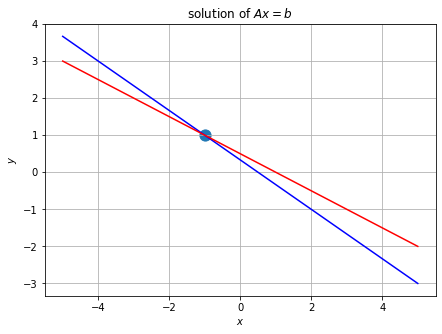

In [30]:
# 描画用のスペースを定義
fig = plt.figure(figsize = (7, 5))
plt.xlabel('$x$') # x ラベル
plt.ylabel('$y$') # y ラベル
plt.plot(x, y1, color = "blue")
plt.plot(x, y2, color = "red")

A_inv = nl.inv(A) # Aの逆行列を計算
sol = np.dot(A_inv, b) # Aの逆行列を左からbにかけたものが解となる
print('sol = {0}'.format(sol))

# 解を点でプロット
plt.scatter(sol[0], sol[1], s=500, marker='.')

plt.title('solution of $Ax=b$')
plt.grid(True)
plt.show()

### 2. 係数行列$B$ が正則ではない場合
$$
B = \left[
   \begin{array}{rrr}
      2 & 1 \\
      6 & 3
    \end{array}
\right]
$$

の場合，上で見たように $B$ は正則ではない．よって，$Bx = b$ の解は一意に定まらない．

今回 $b = (-3,3)$ として，連立1次方程式 $Bx = b$ を解くことを試みる．

まずは，この方程式の表す2直線を表示してみる．

In [31]:
# Bx = b
B = np.array([[2, 1], [6, 3]])
b = np.array((-3,3))
x = np.linspace(-5, 5, 100) # [-5,5]の範囲で100点等間隔にとる

# 方程式の表す直線の式
y1 = (-B[0][0] * x + b[0]) / B[0][1]
y2 = (-B[1][0] * x + b[1]) / B[1][1]

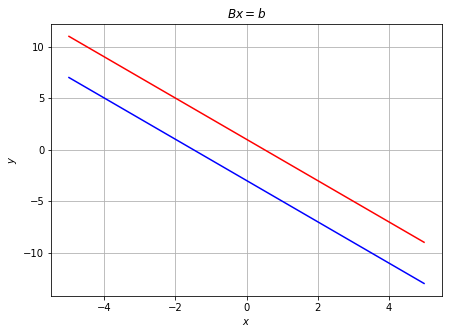

In [32]:
# 描画用のスペースを定義
fig = plt.figure(figsize = (7, 5))
plt.xlabel('$x$') # x ラベル
plt.ylabel('$y$') # y ラベル
plt.plot(x, y1, color = "blue")
plt.plot(x, y2, color = "red")

plt.title('$Bx=b$')
plt.grid(True)
plt.show()

上のように，2直線は平行なので解は存在しないことがわかる（不能）．

$B$ の一般逆行列 $B^-$ を用いて，$x = B^- b$ とすることで，'それらしい解' を計算することができる．

sol = [0.24 0.12]


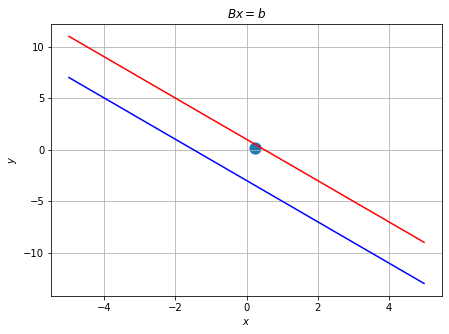

In [33]:
Bp = nl.pinv(B) # 一般逆行列の計算
psol = np.dot(Bp, b)
print('sol = {0}'.format(psol))


# 描画用のスペースを定義
fig = plt.figure(figsize = (7, 5))
plt.xlabel('$x$') # x ラベル
plt.ylabel('$y$') # y ラベル
plt.plot(x, y1, color = "blue")
plt.plot(x, y2, color = "red")
plt.scatter(psol[0], psol[1], s=500, marker='.')

plt.title('$Bx=b$')
plt.grid(True)
plt.show()

### 3. 多すぎる方程式

未知数2つに対して3つの方程式からなる連立方程式を考える．

係数行列を
$$
A = \left[
   \begin{array}{rrr}
      1 & 1 \\
      1 & -1 \\
      0 & 1
    \end{array}
\right]
$$

$b = (4,0,1)$ として， $Ax=b$ を考える． 

この方程式は不能(解なし)であるが，一般逆行列を利用することで 'それらしい解' を計算できる．

※ 'それらしい解' とは，最小二乗法の結果として得られる．

In [35]:
# Ax = b
A = np.array([[1, 1], [1, -1], [0, 1]])
b = np.array((4, 0, 1))
x = np.linspace(-1, 4, 100) # [-5,5]の範囲で100点等間隔にとる

# 方程式の表す直線の式
y1 = (-A[0][0] * x + b[0]) / A[0][1]
y2 = (-A[1][0] * x + b[1]) / A[1][1]
y3 = (-A[2][0] * x + b[2]) / A[2][1]

sol = [2.         1.66666667]


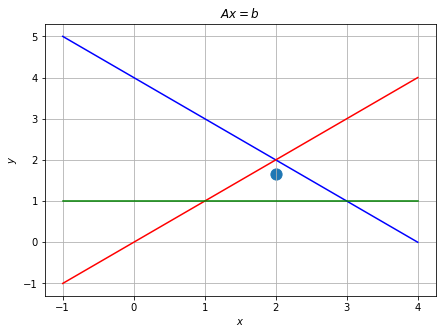

In [36]:
Ap = nl.pinv(A) # 一般逆行列の計算
psol = np.dot(Ap, b)
print('sol = {0}'.format(psol))

# 描画用のスペースを定義
fig = plt.figure(figsize = (7, 5))
plt.xlabel('$x$') # x ラベル
plt.ylabel('$y$') # y ラベル
plt.plot(x, y1, color = "blue")
plt.plot(x, y2, color = "red")
plt.plot(x, y3, color = "green")
plt.scatter(psol[0], psol[1], s=500, marker='.')

plt.title('$Ax=b$')
plt.grid(True)
plt.show()